In [1]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings






In [2]:
#Data collection and analysis
#Loading data from csv file to pandas dataframe
insurance_dataset= pd.read_csv('D:\\Medical insurance price predictor\\insurance.csv')




In [3]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#Finding no. of rows and columns
insurance_dataset.shape

(1338, 7)

In [5]:
#Analyzing dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
#checking missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Data  Analysis

In [7]:
#Statistical measure for dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\Acer\AppData\Local\Temp\ipykernel_13436\1371750064.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['age'], kde=True)


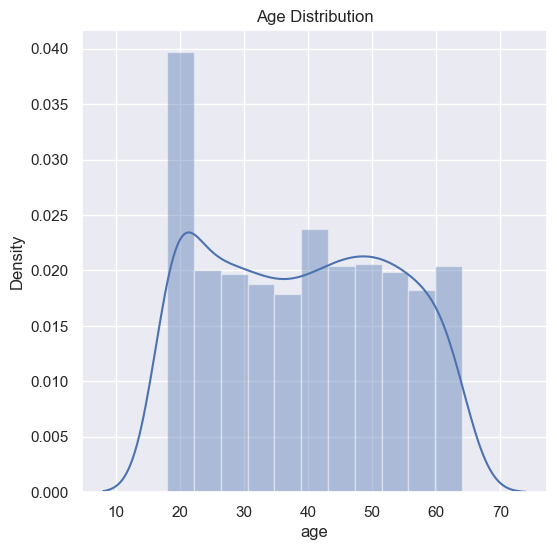

In [8]:
#Distribution of age
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'], kde=True)
plt.title('Age Distribution')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

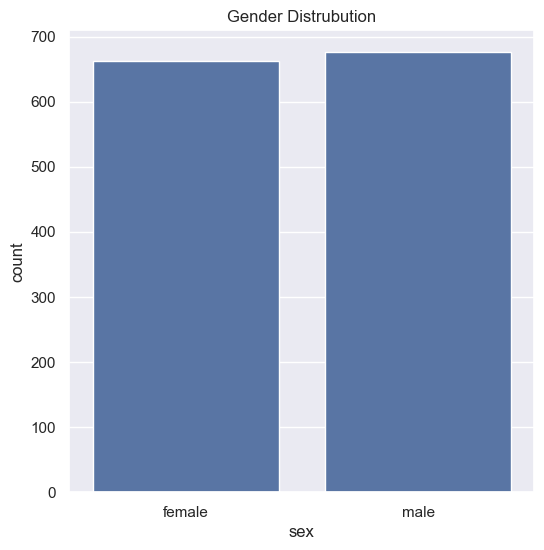

In [9]:
# Distribution of gender
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=insurance_dataset)
plt.title('Gender Distrubution')
plt.show

In [10]:
insurance_dataset ['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

C:\Users\Acer\AppData\Local\Temp\ipykernel_13436\4273266299.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['bmi'], kde=True)


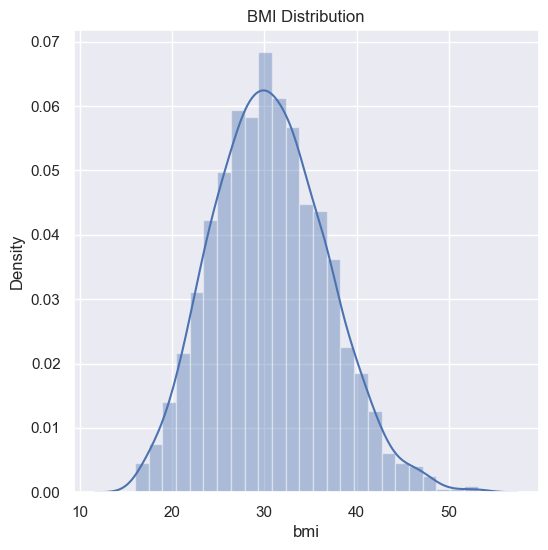

In [11]:
# BMI Distribution
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'], kde=True)
plt.title('BMI Distribution')
plt.show()

Normal BMI range: 18.5 - 24.9

<function matplotlib.pyplot.show(close=None, block=None)>

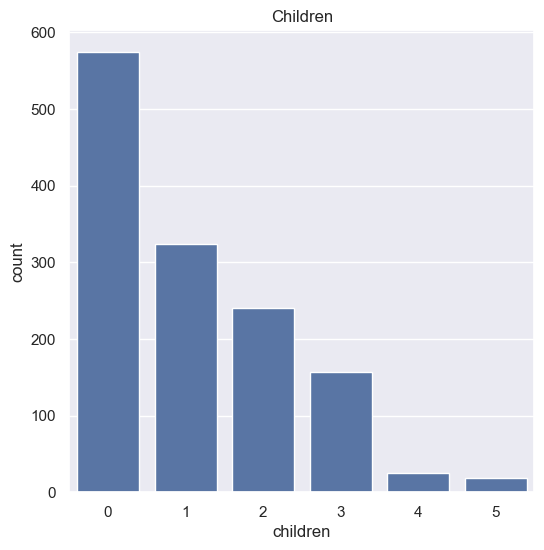

In [12]:
# Distribution of no. of children
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=insurance_dataset)
plt.title('Children')
plt.show

In [13]:
insurance_dataset ['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

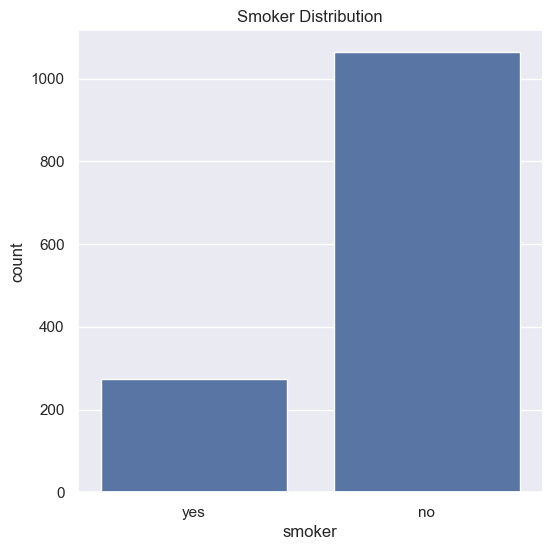

In [14]:
# Distribution of Smoker
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=insurance_dataset)
plt.title('Smoker Distribution')
plt.show

In [15]:
insurance_dataset ['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

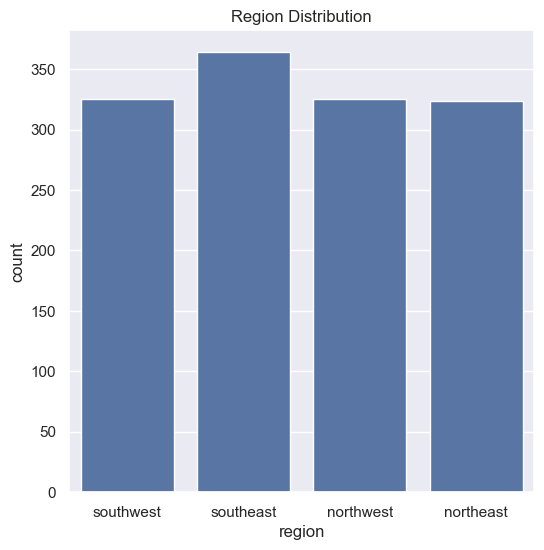

In [16]:
# Distribution of region
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=insurance_dataset)
plt.title('Region Distribution')
plt.show

In [17]:
insurance_dataset ['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

C:\Users\Acer\AppData\Local\Temp\ipykernel_13436\3989419876.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['charges'], kde=True)


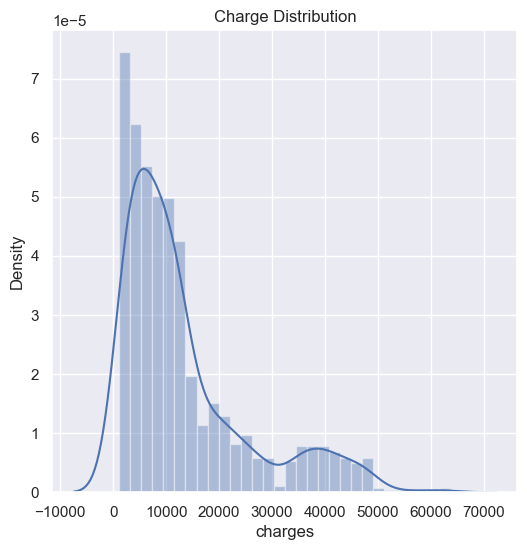

In [18]:
#Distribution of charges

plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['charges'], kde=True)
plt.title('Charge Distribution')
plt.show()

Data Preprocessing

In [19]:
#Encoding categorical features
insurance_dataset = insurance_dataset.infer_objects(copy=False)
#Gender
insurance_dataset.replace({'sex':{'male':0,'female':1}},inplace=True) 

#Smoker
insurance_dataset.replace({'smoker':{'yes':0,'no':1}},inplace=True) 

#Region
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True) 



C:\Users\Acer\AppData\Local\Temp\ipykernel_13436\3697976479.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'sex':{'male':0,'female':1}},inplace=True)
C:\Users\Acer\AppData\Local\Temp\ipykernel_13436\3697976479.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'smoker':{'yes':0,'no':1}},inplace=True)
C:\Users\Acer\AppData\Local\Temp\ipykernel_13436\3697976479.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To 

Splitting features and target

In [20]:
X=insurance_dataset.drop(columns='charges',axis=1)
Y=insurance_dataset['charges']

In [21]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [22]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Splitting of training and testing data

In [23]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2, random_state=2)

In [24]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model Training

Linear Regression

In [25]:
#Loading model
regressor=LinearRegression()

In [26]:
regressor.fit(X_train, Y_train)

LinearRegression()

Model Evaluation

In [27]:
#Prediction on training data
training_data_prediction=regressor.predict(X_train)

In [28]:
#Performance training metrix
r2_train = metrics.r2_score(Y_train,training_data_prediction)
print('Performance of training data: ', r2_train)

Performance of training data:  0.751505643411174


In [29]:
#Prediction on test data
training_data_prediction=regressor.predict(X_test)

In [30]:
# **Display slope (coefficients) and intercept**
print("Slope (Coefficients):", regressor.coef_)
print("Intercept:", regressor.intercept_)

Slope (Coefficients): [   251.40512196     26.11715966    330.64637157    580.27438296
 -23928.10171061    212.22242728]
Intercept: 11357.668742540913


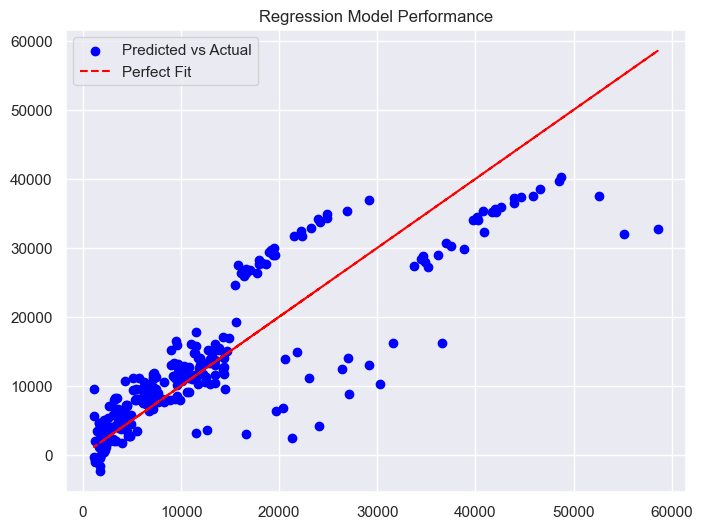

In [31]:
# **Plot the regression results**
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, regressor.predict(X_test), color="blue", label="Predicted vs Actual")
plt.plot(Y_test, Y_test, color="red", linestyle="--", label="Perfect Fit")
plt.xlabel("")
plt.ylabel("")
plt.title("Regression Model Performance")
plt.legend()
plt.show()

Building a predictive System


INPUT TO BE USED FOR CATEGORICAL FEATURES:

SEX------> MALE:0 | FEMALE:1

SMOKER---> YES:0  | NO:1 

REGION---> SOUTHEAST:0 | SOUTHWEST:1 | NORTHEAST:2 | NORTHWEST:3


ORDER OF INPUT:

AGE-SEX-BMI-CHILDREN-SMOKER-REGION

In [32]:
input_data=(45,1,25.74,0,1,0)

input_data_as_numpy_array=np.asarray(input_data)

input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction=regressor.predict(input_data_reshaped)

print(prediction)

warnings.filterwarnings("ignore", category=UserWarning)


[5996.60951447]


C:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
